In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import *
from interClusLib.visualization import ClusteringVisualization

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          5.652587        31.331372        18.187074        51.853353   
1         10.580296        77.406429        40.640847        62.695992   
2         60.554198        68.563366         0.893406        81.843582   
3         39.098126        98.035358        30.327693        70.867360   
4          4.871446        99.464893        52.738496        88.634951   
5         14.237646        27.165854        33.048743        99.318107   
6         38.221068        48.809439        20.241178        79.916252   
7         12.032994        45.946877        24.302871        48.143201   
8         21.469907        35.568259        39.924229        46.649719   
9          1.653044        92.826135        43.618935        63.653569   
10         8.907063        87.317236        36.906662        79.251

In [2]:
model = IntervalAgglomerativelustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

[2 0 3 1 0 2 0 2 2 0 0 2 0 1 2 0 0 3 1 0 1 2 0 3 2 3 0 1 0 2]


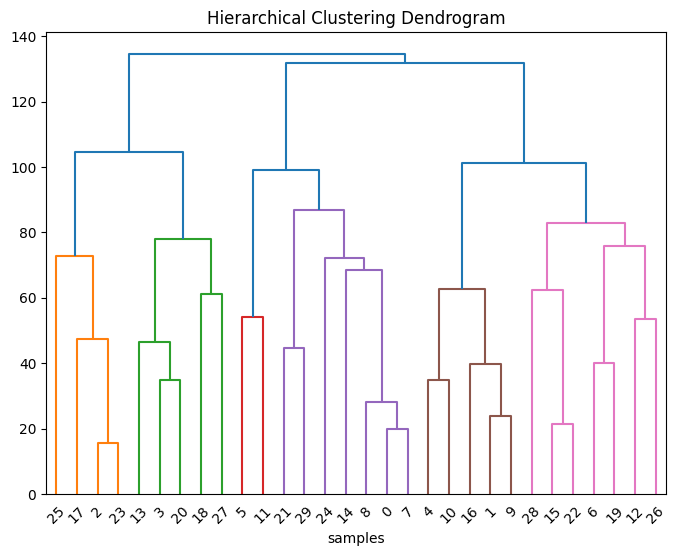

In [3]:
plt.figure(figsize=(8, 6))
ClusteringVisualization.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

AttributeError: type object 'IntervalMetrics' has no attribute 'MULTI_FUNCS'

In [ ]:
model.get_hard_assignments()

array([2, 1, 3, 1, 3, 0, 2, 2, 3, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 3,
       2, 3, 0, 3, 2, 1, 0, 0])

In [ ]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

In [ ]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)


Neuron (1, 1) has these sample indices => [0, 2, 4, 8, 20, 21, 22, 23, 25, 26]
Neuron (0, 0) has these sample indices => [1, 5, 10, 13, 17, 18, 29]
Neuron (1, 0) has these sample indices => [3, 7, 11, 14, 15, 16, 27]
Neuron (0, 1) has these sample indices => [6, 9, 12, 19, 24, 28]


In [ ]:
som.train_batch(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

Neuron (1, 0) has these sample indices => [0, 6, 20, 22, 26, 28]
Neuron (0, 0) has these sample indices => [1, 3, 7, 10, 11, 13, 14, 16, 17, 18, 27, 29]
Neuron (1, 1) has these sample indices => [2, 4, 8, 9, 21, 23, 24, 25]
Neuron (0, 1) has these sample indices => [5, 12, 15, 19]
